# Imports and Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Resources/Delinquency_prediction_dataset.csv')

# Data Analysis

In [14]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [15]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [43]:
# Print columns with with missed values or less than 8 unique values
missed_values = None
col_with_null = []
col_with_unique = []
for col in df.columns:
    missed_values = df[col].isnull().sum() 
    unique = df[col].nunique()
    if missed_values:
        col_with_null.append(col)
        print(f"{col} has {missed_values} null values!")
    if unique < 8 and df[col].dtype == "object":
        col_with_unique.append(col)
        print(f" {col} has {unique} unique values which are: {df[col].unique()}")
print("Features with null values: ", col_with_null)
print("Features with unique values: ", col_with_unique)

Income has 39 null values!
Credit_Score has 2 null values!
Loan_Balance has 29 null values!
 Employment_Status has 6 unique values which are: ['EMP' 'Self-employed' 'Unemployed' 'employed' 'Employed' 'retired']
 Credit_Card_Type has 5 unique values which are: ['Student' 'Standard' 'Platinum' 'Gold' 'Business']
 Location has 5 unique values which are: ['Los Angeles' 'Phoenix' 'Chicago' 'New York' 'Houston']
 Month_1 has 3 unique values which are: ['Late' 'Missed' 'On-time']
 Month_2 has 3 unique values which are: ['Late' 'Missed' 'On-time']
 Month_3 has 3 unique values which are: ['Missed' 'Late' 'On-time']
 Month_4 has 3 unique values which are: ['Late' 'Missed' 'On-time']
 Month_5 has 3 unique values which are: ['Missed' 'On-time' 'Late']
 Month_6 has 3 unique values which are: ['Late' 'On-time' 'Missed']
Features with null values:  ['Income', 'Credit_Score', 'Loan_Balance']
Features with unique values:  ['Employment_Status', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Mont

## Data preprocessing tips
- Mean imputation for Income, Credi_score, Loan_Balance
- First fix values then One hot encoding on Emplyment_status
- One hot encoding for Location
- Ordinal encoding for Credit_card
- New 3 columns showing : missed values in 6 months, late values, ON-time values in 6 months.

In [19]:
# List out numeric and categorical columns
numeric_feat = [col for col in df.columns if df[col].dtype != "object"]
numeric_feat

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Delinquent_Account',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure']

In [42]:
# Lets calculate mean, median for each feature
for col in numeric_feat:
    print(f"{col} : mean - {df[col].mean()}")
    print(f"     median - {df[col].median()}")
    print()

Age : mean - 46.266
     median - 46.5

Income : mean - 108379.89370932755
     median - 107658.0

Credit_Score : mean - 577.7168674698795
     median - 586.0

Credit_Utilization : mean - 0.4914459051243956
     median - 0.48563557676302704

Missed_Payments : mean - 2.968
     median - 3.0

Delinquent_Account : mean - 0.16
     median - 0.0

Loan_Balance : mean - 48654.42887473461
     median - 45776.0

Debt_to_Income_Ratio : mean - 0.29886164364310636
     median - 0.3016339347077065

Account_Tenure : mean - 9.74
     median - 10.0



## Outcomes

    - Age: Mean (46.27) close to median (46.5), indicating symmetrical age distribution; min age 18, max 74.

    - Income: Large spread, missing for ~39 customers; median income close to mean. 

    - Credit_Score: Mean 577, median 586, range 301-847; reasonable credit score spread.

    - Credit_Utilization: Mean ~0.49 (49%), with max slightly above 1 (unusual but minor).

    - Missed_Payments: Average ~3 missed payments, with max 6 (range indicates some customers are high risk).

    - Delinquent_Account: Mean 0.16 implies about 16% customers are delinquent.

    - Loan_Balance: Large variability, median (45,776) quite lower than max ~99k, showing high debt concentration.

    - Debt_to_Income_Ratio: Mean ~0.3 (30%), moderate spread, max ~0.55.

    - Account_Tenure: Mean 9.7 years, median 10, range 0 to 19 years.


# Data preprocessing

## Data preprocessing tips
- Mean imputation for Income, Credi_score, Loan_Balance
- First fix values then ONe hot encoding
- One hot encoding for LOcation
- New 3 columns showing missed values in 6 months, late values, ON-time values in 6 months.

In [44]:
# 1. Mean Imputation for Income, Credit_Score, Loan_Balance
for col in ['Income', 'Credit_Score', 'Loan_Balance']:
    df[col] = df[col].fillna(df[col].mean())

In [45]:
# 2. Fix Employment_Status values (standardize casing)
df['Employment_Status'] = df['Employment_Status'].str.strip().str.lower()
# Replace variations to consistent categories
df['Employment_Status'] = df['Employment_Status'].replace({
    'emp': 'employed',
    'employed': 'employed',
    'self-employed': 'self-employed',
    'unemployed': 'unemployed',
    'retired': 'retired'
})

# One-hot encoding for Employment_Status and Location
df = pd.get_dummies(df, columns=['Employment_Status', 'Location'], drop_first=True)

In [46]:
df.head(10)

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,...,Month_4,Month_5,Month_6,Employment_Status_retired,Employment_Status_self-employed,Employment_Status_unemployed,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.000000,0.317396,18,...,Late,Missed,Late,False,False,False,False,True,False,False
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.000000,0.196093,0,...,Missed,On-time,On-time,False,True,False,False,False,False,True
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.000000,0.301655,1,...,On-time,Missed,Late,False,True,False,False,False,False,False
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.000000,0.264794,15,...,Missed,Late,Late,False,False,True,False,False,False,True
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.000000,0.510583,11,...,Late,Late,Late,False,True,False,False,False,False,True
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.000000,0.260688,7,...,Missed,Missed,Late,False,False,True,False,False,True,False
6,CUST0007,38,35056.0,354.0,0.390581,3,0,4638.000000,0.484265,17,...,Late,Missed,Late,False,False,False,False,False,True,False
7,CUST0008,56,123215.0,415.0,0.532715,5,0,55776.000000,0.358695,1,...,Late,Missed,Late,False,False,False,False,False,True,False
8,CUST0009,36,66991.0,405.0,0.413035,5,1,48654.428875,0.219854,12,...,Missed,Late,On-time,False,False,False,False,False,False,True
9,CUST0010,40,34870.0,679.0,0.361824,4,0,93922.000000,0.333081,5,...,On-time,Missed,Missed,False,False,False,False,True,False,False


In [47]:
# 3. Ordinal encoding for Credit_Card_Type
credit_card_order = ['Student', 'Standard', 'Business', 'Gold', 'Platinum']
df['Credit_Card_Type'] = df['Credit_Card_Type'].astype(pd.api.types.CategoricalDtype(categories=credit_card_order, ordered=True))
df['Credit_Card_Type'] = df['Credit_Card_Type'].cat.codes

In [49]:
df['Credit_Card_Type'].head

<bound method NDFrame.head of 0      0
1      1
2      4
3      4
4      1
      ..
495    2
496    0
497    0
498    0
499    2
Name: Credit_Card_Type, Length: 500, dtype: int8>

In [50]:
# 4. New columns counting missed, late, and on-time values in last 6 months
payment_cols = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

# Map payment status to numeric codes for counting
payment_map = {'Missed': 2, 'Late': 1, 'On-time': 0}
df[payment_cols] = df[payment_cols].replace(payment_map)

df['Missed_Count'] = df[payment_cols].apply(lambda x: (x == 2).sum(), axis=1)
df['Late_Count'] = df[payment_cols].apply(lambda x: (x == 1).sum(), axis=1)
df['On_time_Count'] = df[payment_cols].apply(lambda x: (x == 0).sum(), axis=1)

/tmp/ipykernel_20709/2188116788.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[payment_cols] = df[payment_cols].replace(payment_map)


In [54]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Account_Tenure', 'Credit_Card_Type',
       'Employment_Status_retired', 'Employment_Status_self-employed',
       'Employment_Status_unemployed', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Phoenix',
       'Missed_Count', 'Late_Count', 'On_time_Count'],
      dtype='object')

In [57]:
# Drop original monthly payment columns
# df.drop(columns=payment_cols+['Customer_ID'], inplace=True)
df.drop(columns=['Customer_ID'], inplace=True)

In [58]:
df.head()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Credit_Card_Type,Employment_Status_retired,Employment_Status_self-employed,Employment_Status_unemployed,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Missed_Count,Late_Count,On_time_Count
0,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,18,0,False,False,False,False,True,False,False,2,4,0
1,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,0,1,False,True,False,False,False,False,True,3,1,2
2,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,1,4,False,True,False,False,False,False,False,2,3,1
3,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,15,4,False,False,True,False,False,False,True,2,4,0
4,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,11,1,False,True,False,False,False,False,True,2,3,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              500 non-null    int64  
 1   Income                           500 non-null    float64
 2   Credit_Score                     500 non-null    float64
 3   Credit_Utilization               500 non-null    float64
 4   Missed_Payments                  500 non-null    int64  
 5   Delinquent_Account               500 non-null    int64  
 6   Loan_Balance                     500 non-null    float64
 7   Debt_to_Income_Ratio             500 non-null    float64
 8   Account_Tenure                   500 non-null    int64  
 9   Credit_Card_Type                 500 non-null    int8   
 10  Employment_Status_retired        500 non-null    bool   
 11  Employment_Status_self-employed  500 non-null    bool   
 12  Employment_Status_unem

In [60]:
# Convert boolean to int, suitable for standardscaler
bool_cols = ['Employment_Status_retired', 'Employment_Status_self-employed', 'Employment_Status_unemployed', 
             'Location_Houston', 'Location_Los Angeles', 'Location_New York', 'Location_Phoenix']

df[bool_cols] = df[bool_cols].astype(int)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              500 non-null    int64  
 1   Income                           500 non-null    float64
 2   Credit_Score                     500 non-null    float64
 3   Credit_Utilization               500 non-null    float64
 4   Missed_Payments                  500 non-null    int64  
 5   Delinquent_Account               500 non-null    int64  
 6   Loan_Balance                     500 non-null    float64
 7   Debt_to_Income_Ratio             500 non-null    float64
 8   Account_Tenure                   500 non-null    int64  
 9   Credit_Card_Type                 500 non-null    int8   
 10  Employment_Status_retired        500 non-null    int64  
 11  Employment_Status_self-employed  500 non-null    int64  
 12  Employment_Status_unem

In [62]:
df.head()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Credit_Card_Type,Employment_Status_retired,Employment_Status_self-employed,Employment_Status_unemployed,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Missed_Count,Late_Count,On_time_Count
0,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,18,0,0,0,0,0,1,0,0,2,4,0
1,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,0,1,0,1,0,0,0,0,1,3,1,2
2,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,1,4,0,1,0,0,0,0,0,2,3,1
3,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,15,4,0,0,1,0,0,0,1,2,4,0
4,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,11,1,0,1,0,0,0,0,1,2,3,1


# Visualizations

In [66]:
import seaborn as sns

[]

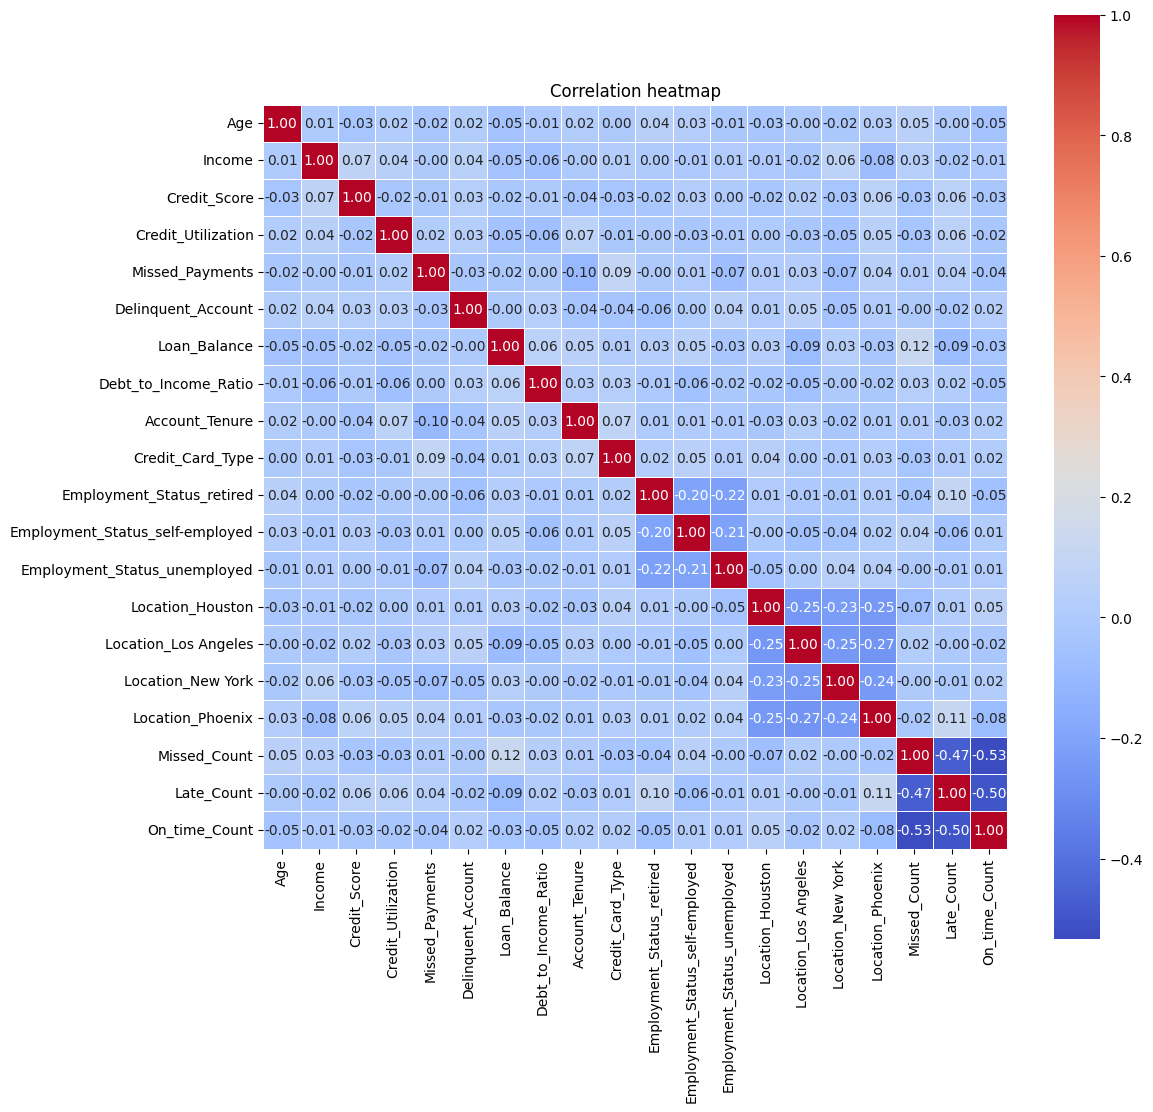

In [70]:
# Correlation heatmap
corr_mat = df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation heatmap")
plt.plot()

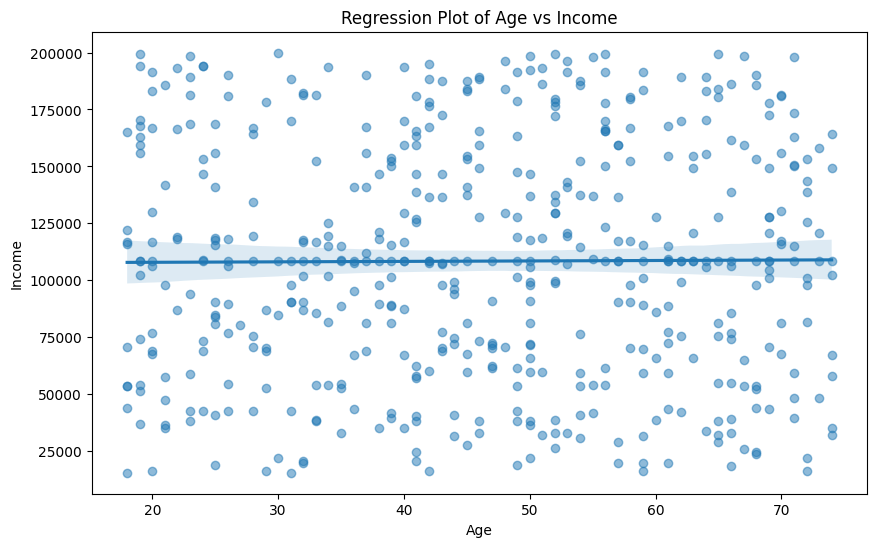

In [80]:
# Age VS Income
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


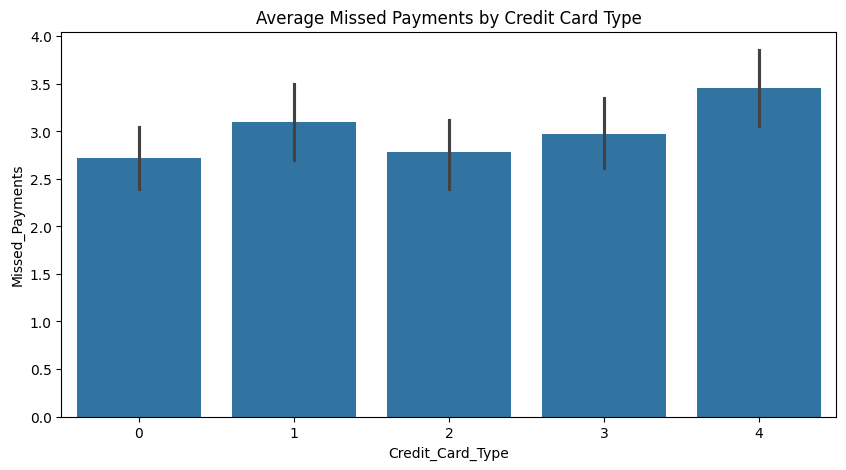

In [77]:
 #  Barplot showing average Missed_Payments by Credit_Card_Type
plt.figure(figsize=(10,5))
sns.barplot(x='Credit_Card_Type', y='Missed_Payments', data=df)
plt.title('Average Missed Payments by Credit Card Type')
plt.show()

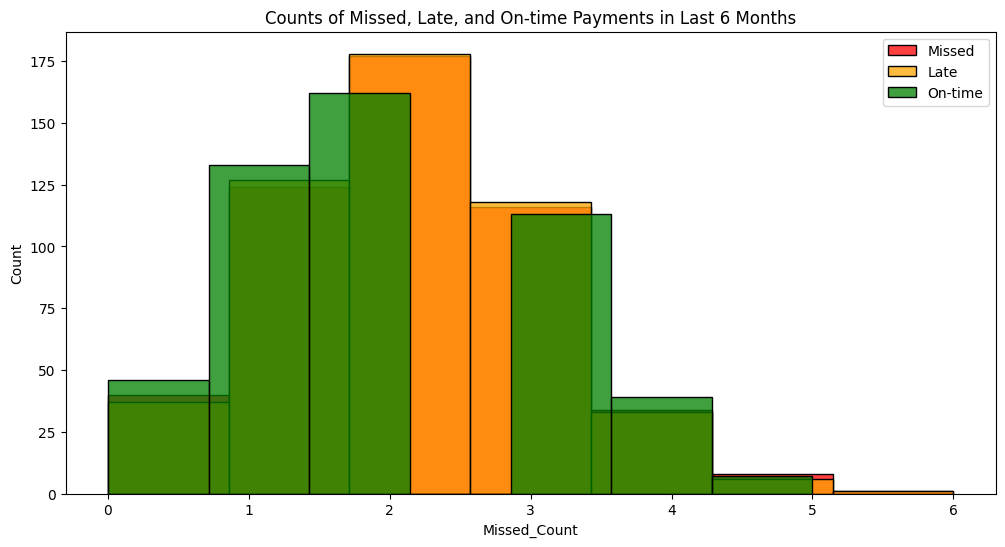

In [78]:
# Payment status counts summary (Missed_Count, Late_Count, On_time_Count)
plt.figure(figsize=(12,6))
sns.histplot(df['Missed_Count'], bins=7, color='red', label='Missed', kde=False)
sns.histplot(df['Late_Count'], bins=7, color='orange', label='Late', kde=False)
sns.histplot(df['On_time_Count'], bins=7, color='green', label='On-time', kde=False)
plt.legend()
plt.title('Counts of Missed, Late, and On-time Payments in Last 6 Months')
plt.show()

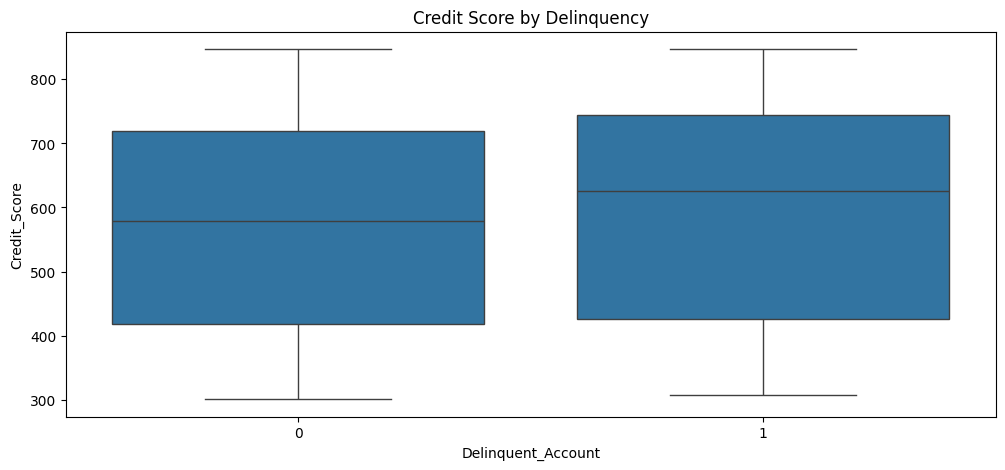

In [81]:
# Boxplot to check outliers by Delinquent_Account (target)
plt.figure(figsize=(12,5))
sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df)
plt.title('Credit Score by Delinquency')
plt.show()